# Pengumpulan Data Pasien
Mengumpulkan data pasien dengan contoh data dummy.

In [53]:
import pandas as pd

# Contoh data dummy pasien
# Membaca data dari file Excel
data_pasien = pd.read_excel('patient_icd_10_rs_sbs.xlsx')

# Membuat DataFrame dari data dummy
df_pasien = pd.DataFrame(data_pasien)

# Menampilkan DataFrame
df_pasien

,ID_Pasien,Nama,rm,tanggal_kunjungan,jenis_perawatan,jenis_pembayaran,jenis_kelamin,status_kawin,status_rujukan,umur,diagnosa_icd10,lama_perawatan
0,57890,IKBAL MAULANA,90001,2021-09-12,IGD,Umum,Laki-laki,Menikah,Rujukan,45,A01,5
1,57891,RIO TUMANGGER,90002,2021-09-12,IGD,BPJS,Laki-laki,Menikah,Non-Rujukan,34,B01,2
2,57224,TINA WANTI SEMBIRING,84330,2021-09-12,Rawat Inap,BPJS,Perempuan,Menikah,Rujukan,56,A02,7
3,24740,nurhaidah,37865,2021-09-12,Rawat Inap,BPJS,Perempuan,Belum Menikah,Non-Rujukan,23,D01,1
4,56241,MAINUR BOANG MANALU,83302,2021-09-12,Rawat Inap,BPJS,Perempuan,Menikah,Rujukan,67,Z01,10
...,...,...,...,...,...,...,...,...,...,...,...,...
65,36511,jubaedah,51008,2021-09-13,Rawat Jalan,BPJS,Perempuan,Menikah,Rujukan,22,A01,1
66,11424,HERIANTO,23367,2021-09-13,Rawat Jalan,BPJS,Laki-laki,Menikah,Rujukan,60,A01.1,1
67,39166,salidin berutu,55235,2021-09-13,Rawat Jalan,BPJS,Laki-laki,Menikah,Non-Rujukan,52,A01.2,1
68,52837,amril sahputra bako,79184,2021-09-13,Rawat Jalan,BPJS,Laki-laki,Menikah,Non-Rujukan,50,A01.3,1


# Pra-pemrosesan Data dan Feature Engineering
Melakukan pra-pemrosesan data dan feature engineering untuk persiapan analisis lebih lanjut.

In [54]:
# Mengubah nama kolom untuk konsistensi
df_pasien.rename(columns={'ID_Pasien': 'id_pasien', 'Nama': 'nama', 'Umur': 'umur', 'Jenis_Kelamin': 'jenis_kelamin', 'Diagnosa_ICD10': 'diagnosa_icd10'}, inplace=True)

# Mengubah kolom 'jenis_kelamin' menjadi numerik
df_pasien['jenis_kelamin'] = df_pasien['jenis_kelamin'].map({'Laki-laki': 1, 'Perempuan': 0})

# Menambahkan kolom 'umur_kategori' berdasarkan rentang umur
bins = [0, 18, 35, 50, 65, 100]
labels = ['Anak-anak', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
df_pasien['umur_kategori'] = pd.cut(df_pasien['umur'], bins=bins, labels=labels, right=False)

# Menampilkan DataFrame setelah pra-pemrosesan
df_pasien

,id_pasien,nama,rm,tanggal_kunjungan,jenis_perawatan,jenis_pembayaran,jenis_kelamin,status_kawin,status_rujukan,umur,diagnosa_icd10,lama_perawatan,umur_kategori
0,57890,IKBAL MAULANA,90001,2021-09-12,IGD,Umum,1,Menikah,Rujukan,45,A01,5,Dewasa
1,57891,RIO TUMANGGER,90002,2021-09-12,IGD,BPJS,1,Menikah,Non-Rujukan,34,B01,2,Dewasa Muda
2,57224,TINA WANTI SEMBIRING,84330,2021-09-12,Rawat Inap,BPJS,0,Menikah,Rujukan,56,A02,7,Paruh Baya
3,24740,nurhaidah,37865,2021-09-12,Rawat Inap,BPJS,0,Belum Menikah,Non-Rujukan,23,D01,1,Dewasa Muda
4,56241,MAINUR BOANG MANALU,83302,2021-09-12,Rawat Inap,BPJS,0,Menikah,Rujukan,67,Z01,10,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,36511,jubaedah,51008,2021-09-13,Rawat Jalan,BPJS,0,Menikah,Rujukan,22,A01,1,Dewasa Muda
66,11424,HERIANTO,23367,2021-09-13,Rawat Jalan,BPJS,1,Menikah,Rujukan,60,A01.1,1,Paruh Baya
67,39166,salidin berutu,55235,2021-09-13,Rawat Jalan,BPJS,1,Menikah,Non-Rujukan,52,A01.2,1,Paruh Baya
68,52837,amril sahputra bako,79184,2021-09-13,Rawat Jalan,BPJS,1,Menikah,Non-Rujukan,50,A01.3,1,Paruh Baya


# Eksplorasi dan Analisis Data Awal (EDA)
Melakukan eksplorasi dan analisis data awal dengan berbagai bagan.

           id_pasien        nama            rm              tanggal_kunjungan  \
count      70.000000          70     70.000000                             70   
unique           NaN          68           NaN                            NaN   
top              NaN  KARMIN TGR           NaN                            NaN   
freq             NaN           2           NaN                            NaN   
mean    33682.757143         NaN  51200.257143  2021-09-12 21:56:34.285714176   
min      2364.000000         NaN   9952.000000            2021-09-12 00:00:00   
25%     19536.250000         NaN  32190.000000            2021-09-13 00:00:00   
50%     31979.500000         NaN  45525.500000            2021-09-13 00:00:00   
75%     52783.000000         NaN  78271.500000            2021-09-13 00:00:00   
max     57894.000000         NaN  90005.000000            2021-09-13 00:00:00   
std     17795.768519         NaN  24616.262183                            NaN   

       jenis_perawatan jeni

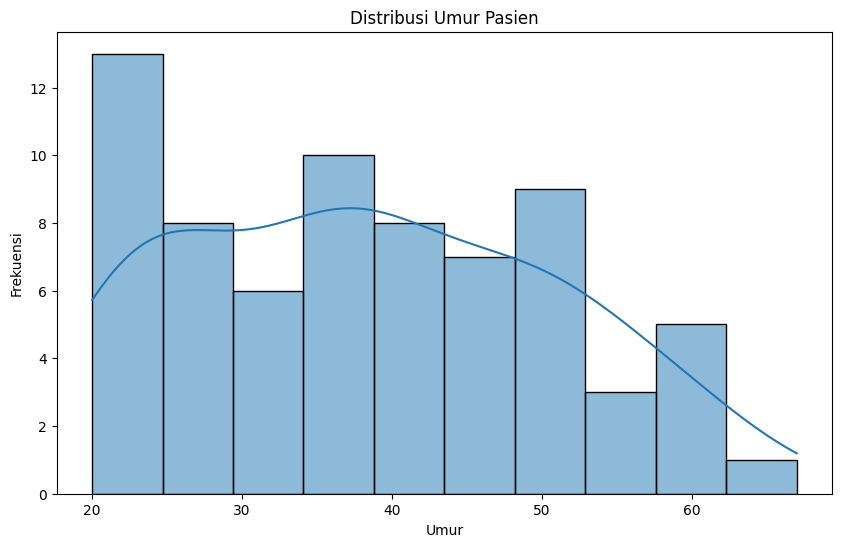

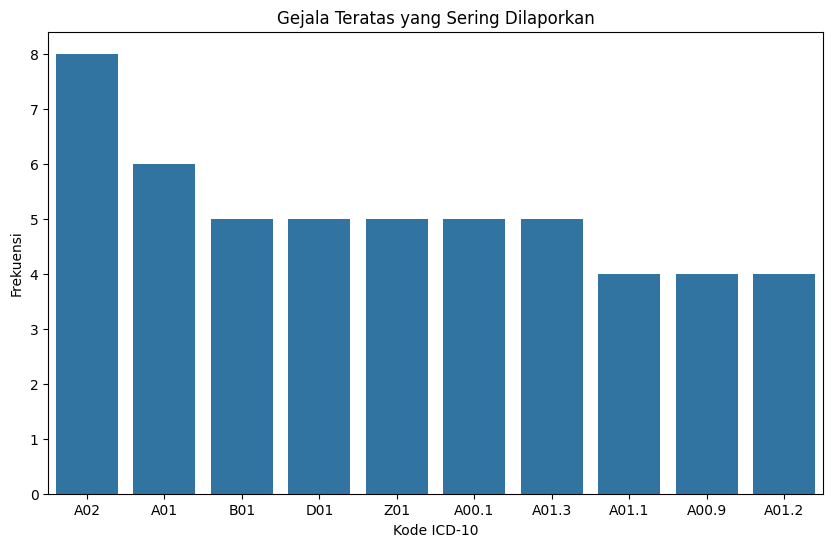

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan statistik deskriptif untuk data pasien
statistik_deskriptif = df_pasien.describe(include='all')
print(statistik_deskriptif)

# Membuat visualisasi distribusi umur pasien
plt.figure(figsize=(10, 6))
sns.histplot(df_pasien['umur'], bins=10, kde=True)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Mengidentifikasi gejala teratas yang sering dilaporkan
gejala_teratas = df_pasien['diagnosa_icd10'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=gejala_teratas.index, y=gejala_teratas.values)
plt.title('Gejala Teratas yang Sering Dilaporkan')
plt.xlabel('Kode ICD-10')
plt.ylabel('Frekuensi')
plt.show()

# Statistik Deskriptif untuk Data Pasien
Melakukan statistik deskriptif untuk data pasien.

           id_pasien        nama            rm              tanggal_kunjungan  \
count      70.000000          70     70.000000                             70   
unique           NaN          68           NaN                            NaN   
top              NaN  KARMIN TGR           NaN                            NaN   
freq             NaN           2           NaN                            NaN   
mean    33682.757143         NaN  51200.257143  2021-09-12 21:56:34.285714176   
min      2364.000000         NaN   9952.000000            2021-09-12 00:00:00   
25%     19536.250000         NaN  32190.000000            2021-09-13 00:00:00   
50%     31979.500000         NaN  45525.500000            2021-09-13 00:00:00   
75%     52783.000000         NaN  78271.500000            2021-09-13 00:00:00   
max     57894.000000         NaN  90005.000000            2021-09-13 00:00:00   
std     17795.768519         NaN  24616.262183                            NaN   

       jenis_perawatan jeni

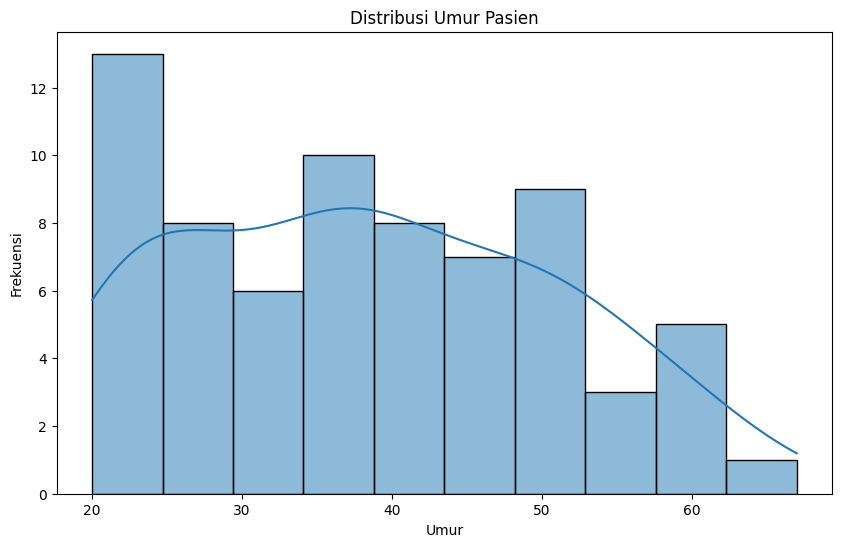

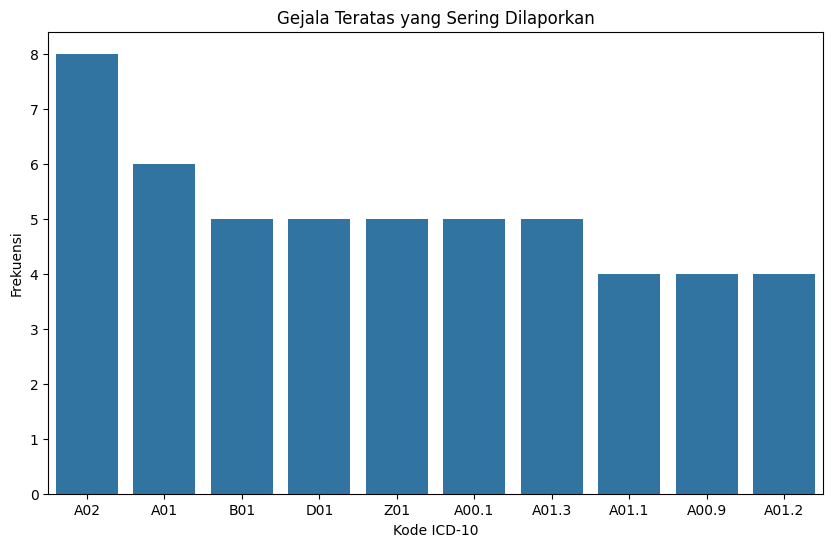

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan statistik deskriptif untuk data pasien
statistik_deskriptif = df_pasien.describe(include='all')
print(statistik_deskriptif)

# Membuat visualisasi distribusi umur pasien
plt.figure(figsize=(10, 6))
sns.histplot(df_pasien['umur'], bins=10, kde=True)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Mengidentifikasi gejala teratas yang sering dilaporkan
gejala_teratas = df_pasien['diagnosa_icd10'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=gejala_teratas.index, y=gejala_teratas.values)
plt.title('Gejala Teratas yang Sering Dilaporkan')
plt.xlabel('Kode ICD-10')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi Distribusi Umur Pasien
Membuat visualisasi distribusi umur pasien.

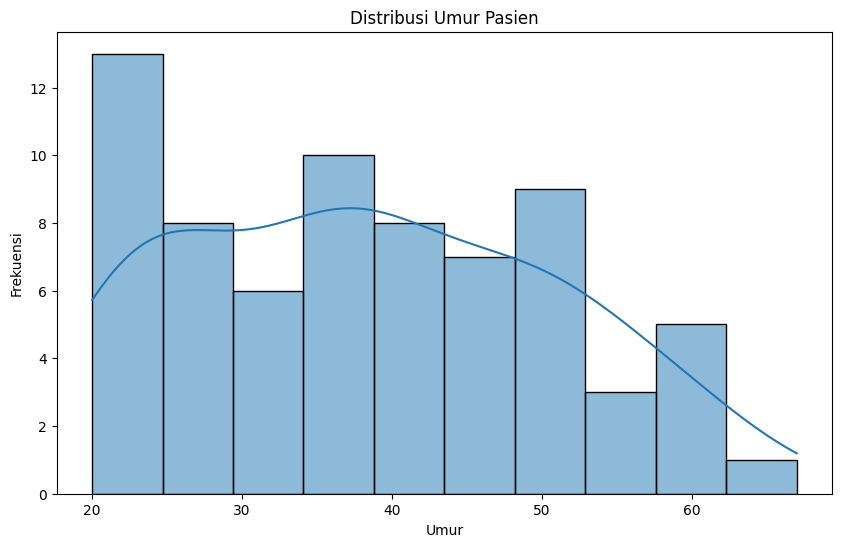

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat visualisasi distribusi umur pasien
plt.figure(figsize=(10, 6))
sns.histplot(df_pasien['umur'], bins=10, kde=True)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Identifikasi Gejala Teratas yang Sering Dilaporkan
Mengidentifikasi gejala teratas yang sering dilaporkan.

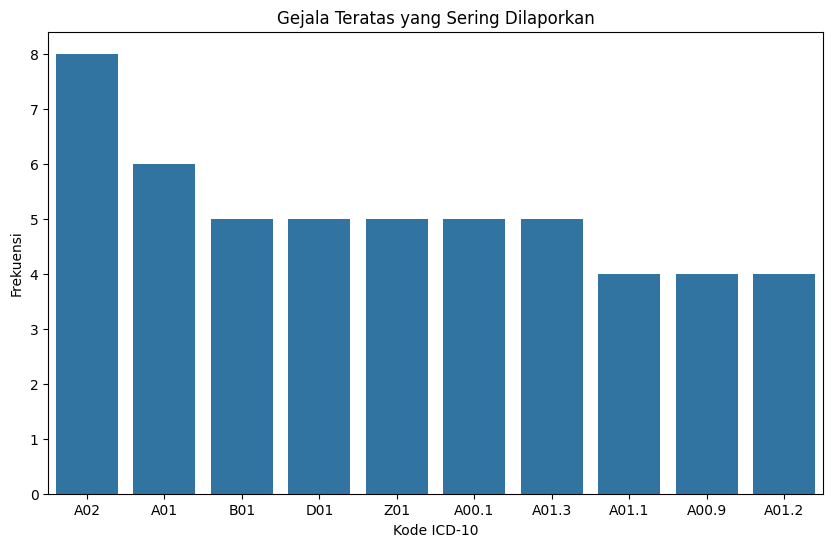

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengidentifikasi gejala teratas yang sering dilaporkan
gejala_teratas = df_pasien['diagnosa_icd10'].value_counts().head(10)

# Membuat visualisasi gejala teratas yang sering dilaporkan
plt.figure(figsize=(10, 6))
sns.barplot(x=gejala_teratas.index, y=gejala_teratas.values)
plt.title('Gejala Teratas yang Sering Dilaporkan')
plt.xlabel('Kode ICD-10')
plt.ylabel('Frekuensi')
plt.show()

# Klasifikasi dengan Naive Bayes
Melakukan klasifikasi dengan Naive Bayes.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Pastikan df_pasien sudah didefinisikan
# df_pasien = pd.read_csv('path_to_your_data.csv')

# Memisahkan fitur dan label
X = df_pasien[['umur', 'jenis_kelamin']]
y = df_pasien['diagnosa_icd10']

# Memastikan tidak ada nilai yang hilang
X = X.dropna()
y = y[X.index]

# Periksa distribusi label
print("Distribusi label dalam data:")
print(y.value_counts())

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Melatih model dengan data latih
nb_model.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = nb_model.predict(X_test)

# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Distribusi label dalam data:
diagnosa_icd10
A02      8
A01      6
B01      5
D01      5
Z01      5
A00.1    5
A01.3    5
A01.1    4
A00.9    4
A01.2    4
A02.1    3
A01.4    3
A02.0    3
A02.9    3
A02.8    3
A01.0    2
A02.2    2
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

       A00.1       0.00      0.00      0.00       2.0
         A01       0.00      0.00      0.00       1.0
       A01.1       0.00      0.00      0.00       2.0
       A01.2       0.00      0.00      0.00       2.0
       A01.4       0.00      0.00      0.00       1.0
       A02.0       0.00      0.00      0.00       2.0
       A02.2       0.00      0.00      0.00       0.0
       A02.8       0.00      0.00      0.00       1.0
       A02.9       0.00      0.00      0.00       1.0
         B01       0.00      0.00      0.00       0.0
         Z01       0.00      0.00      0.00       2.0

    accuracy                           0.00      14.0
   macro avg    

# Klasifikasi Decision Tree
Melakukan klasifikasi dengan Decision Tree.

Classification Report Decision Tree:
              precision    recall  f1-score   support

       A00.1       0.00      0.00      0.00       2.0
       A00.9       0.00      0.00      0.00       0.0
         A01       0.00      0.00      0.00       1.0
       A01.1       0.00      0.00      0.00       2.0
       A01.2       0.00      0.00      0.00       2.0
       A01.3       0.00      0.00      0.00       0.0
       A01.4       0.00      0.00      0.00       1.0
         A02       0.00      0.00      0.00       0.0
       A02.0       0.00      0.00      0.00       2.0
       A02.1       0.00      0.00      0.00       0.0
       A02.2       0.00      0.00      0.00       0.0
       A02.8       0.00      0.00      0.00       1.0
       A02.9       0.00      0.00      0.00       1.0
         B01       0.00      0.00      0.00       0.0
         Z01       0.00      0.00      0.00       2.0

    accuracy                           0.00      14.0
   macro avg       0.00      0.00      0.00

<Figure size 1000x600 with 0 Axes>

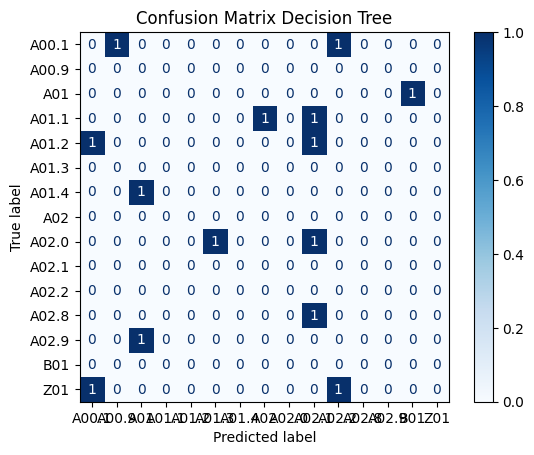

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dt_model.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("Accuracy Score Decision Tree:")
print(accuracy_score(y_test, y_pred_dt))

# Plot confusion matrix
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_dt,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix Decision Tree')
plt.show()

# Pelatihan Model Machine Learning untuk Klasifikasi ICD-10
Melatih model machine learning untuk klasifikasi ICD-10.

    id_pasien                  nama     rm tanggal_kunjungan jenis_perawatan  \
0       57890         IKBAL MAULANA  90001        2021-09-12             IGD   
1       57891         RIO TUMANGGER  90002        2021-09-12             IGD   
2       57224  TINA WANTI SEMBIRING  84330        2021-09-12      Rawat Inap   
3       24740             nurhaidah  37865        2021-09-12      Rawat Inap   
4       56241   MAINUR BOANG MANALU  83302        2021-09-12      Rawat Inap   
..        ...                   ...    ...               ...             ...   
65      36511              jubaedah  51008        2021-09-13     Rawat Jalan   
66      11424              HERIANTO  23367        2021-09-13     Rawat Jalan   
67      39166        salidin berutu  55235        2021-09-13     Rawat Jalan   
68      52837   amril sahputra bako  79184        2021-09-13     Rawat Jalan   
69      28961  zeska dewi handayani  42118        2021-09-13     Rawat Jalan   

   jenis_pembayaran  jenis_kelamin   st

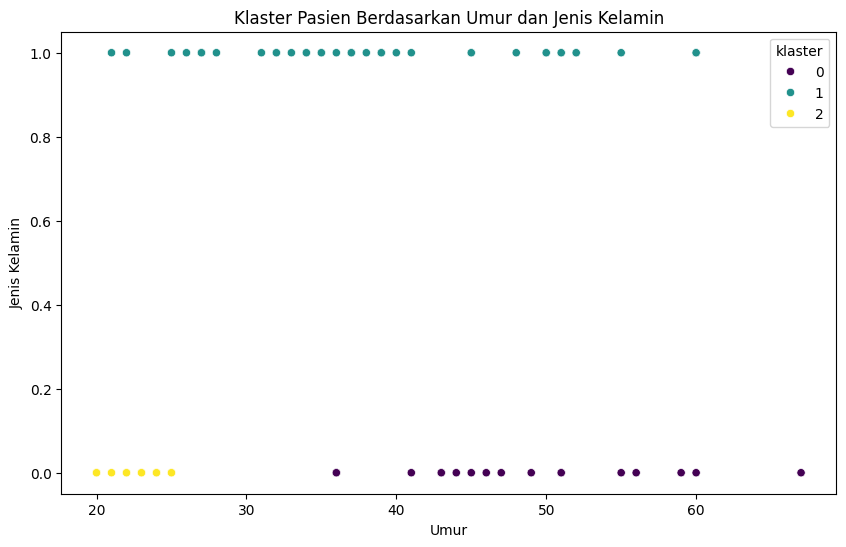

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Classification Report Naive Bayes:
              precision    recall  f1-score   support

       A00.1       0.00      0.00      0.00       2.0
         A01       0.00      0.00      0.00       1.0
       A01.1       0.00      0.00      0.00       2.0
       A01.2       0.00      0.00      0.00       2.0
       A01.4       0.00      0.00      0.00       1.0
       A02.0       0.00      0.00      0.00       2.0
       A02.2       0.00      0.00      0.00       0.0
       A02.8       0.00      0.00      0.00       1.0
       A02.9       0.00      0.00      0.00       1.0
         B01       0.00      0.00      0.00       0.0
         Z01       0.00      0.00      0.00       2.0

    accuracy                           0.00      14.0
   macro avg       0.00      0.00      0.00      14.0
weighted avg       0.00      0.00      0.

<Figure size 1000x600 with 0 Axes>

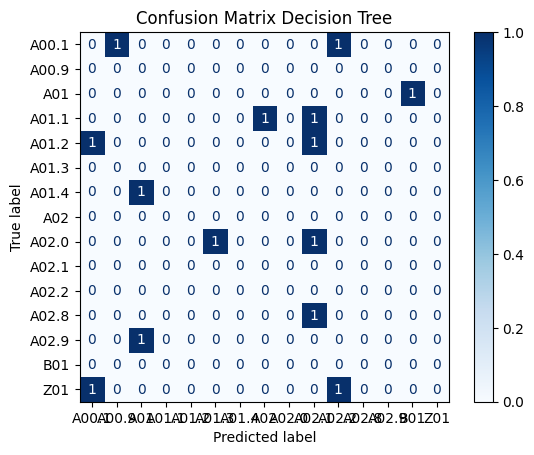

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Melatih model KMeans
kmeans.fit(X_scaled)

# Menambahkan label klaster ke DataFrame
df_pasien['klaster'] = kmeans.labels_

# Menampilkan DataFrame dengan klaster
print(df_pasien)

# Membuat visualisasi klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='umur', y='jenis_kelamin', hue='klaster', data=df_pasien, palette='viridis')
plt.title('Klaster Pasien Berdasarkan Umur dan Jenis Kelamin')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin')
plt.show()

# Menggunakan Apriori untuk menemukan aturan asosiasi
# Mengubah data menjadi format one-hot encoding
df_onehot = pd.get_dummies(df_pasien[['diagnosa_icd10', 'klaster']], columns=['diagnosa_icd10', 'klaster'])

# Menjalankan algoritma Apriori
frequent_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)

# Menemukan aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Menampilkan aturan asosiasi
print(rules)

# Evaluasi model Naive Bayes
print("Classification Report Naive Bayes:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Accuracy Score Naive Bayes:")
print(accuracy_score(y_test, y_pred))

# Evaluasi model Decision Tree
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("Accuracy Score Decision Tree:")
print(accuracy_score(y_test, y_pred_dt))

# Plot confusion matrix Decision Tree
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_dt,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix Decision Tree')
plt.show()

# Klastering
Melakukan klastering pada data pasien.

    id_pasien                  nama     rm tanggal_kunjungan jenis_perawatan  \
0       57890         IKBAL MAULANA  90001        2021-09-12             IGD   
1       57891         RIO TUMANGGER  90002        2021-09-12             IGD   
2       57224  TINA WANTI SEMBIRING  84330        2021-09-12      Rawat Inap   
3       24740             nurhaidah  37865        2021-09-12      Rawat Inap   
4       56241   MAINUR BOANG MANALU  83302        2021-09-12      Rawat Inap   
..        ...                   ...    ...               ...             ...   
65      36511              jubaedah  51008        2021-09-13     Rawat Jalan   
66      11424              HERIANTO  23367        2021-09-13     Rawat Jalan   
67      39166        salidin berutu  55235        2021-09-13     Rawat Jalan   
68      52837   amril sahputra bako  79184        2021-09-13     Rawat Jalan   
69      28961  zeska dewi handayani  42118        2021-09-13     Rawat Jalan   

   jenis_pembayaran  jenis_kelamin   st

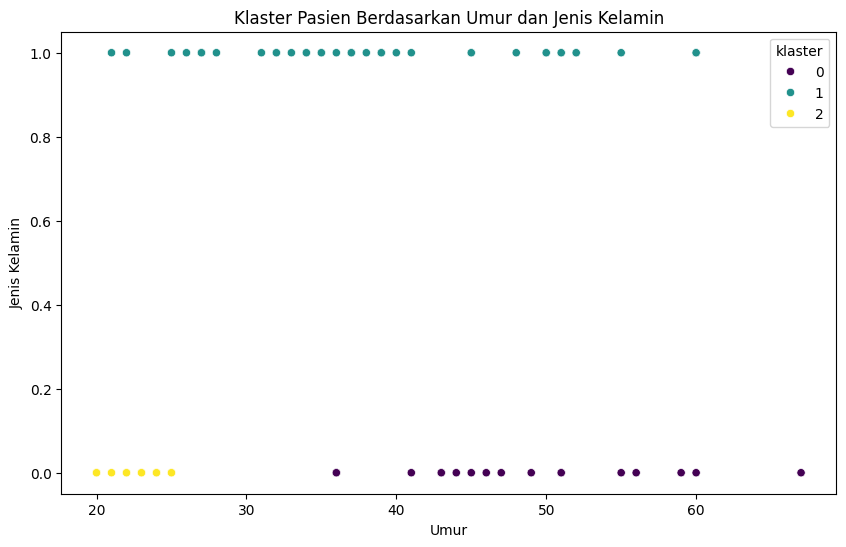

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pasien[['umur', 'jenis_kelamin']])

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Melatih model KMeans
kmeans.fit(X_scaled)

# Menambahkan label klaster ke DataFrame
df_pasien['klaster'] = kmeans.labels_

# Menampilkan DataFrame dengan klaster
print(df_pasien)

# Membuat visualisasi klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='umur', y='jenis_kelamin', hue='klaster', data=df_pasien, palette='viridis')
plt.title('Klaster Pasien Berdasarkan Umur dan Jenis Kelamin')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin')
plt.show()

# Asosiasi dengan Apriori
Melakukan asosiasi dengan algoritma Apriori.

In [66]:
from mlxtend.frequent_patterns import apriori, association_rules

# Menggunakan Apriori untuk menemukan aturan asosiasi
# Mengubah data menjadi format one-hot encoding
df_onehot = pd.get_dummies(df_pasien[['diagnosa_icd10', 'klaster']], columns=['diagnosa_icd10', 'klaster'])

# Menjalankan algoritma Apriori
frequent_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)

# Menemukan aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Menampilkan aturan asosiasi
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


# Evaluasi Model dan Interpretasi Hasil
Melakukan evaluasi model dan interpretasi hasil dengan berbagai bagan.

Classification Report Naive Bayes:
              precision    recall  f1-score   support

       A00.1       0.00      0.00      0.00       2.0
         A01       0.00      0.00      0.00       1.0
       A01.1       0.00      0.00      0.00       2.0
       A01.2       0.00      0.00      0.00       2.0
       A01.4       0.00      0.00      0.00       1.0
       A02.0       0.00      0.00      0.00       2.0
       A02.2       0.00      0.00      0.00       0.0
       A02.8       0.00      0.00      0.00       1.0
       A02.9       0.00      0.00      0.00       1.0
         B01       0.00      0.00      0.00       0.0
         Z01       0.00      0.00      0.00       2.0

    accuracy                           0.00      14.0
   macro avg       0.00      0.00      0.00      14.0
weighted avg       0.00      0.00      0.00      14.0

Accuracy Score Naive Bayes:
0.0


<Figure size 1000x600 with 0 Axes>

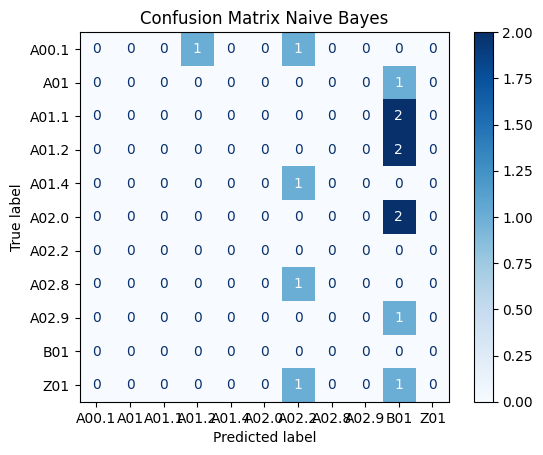

Classification Report Decision Tree:
              precision    recall  f1-score   support

       A00.1       0.00      0.00      0.00       2.0
       A00.9       0.00      0.00      0.00       0.0
         A01       0.00      0.00      0.00       1.0
       A01.1       0.00      0.00      0.00       2.0
       A01.2       0.00      0.00      0.00       2.0
       A01.3       0.00      0.00      0.00       0.0
       A01.4       0.00      0.00      0.00       1.0
         A02       0.00      0.00      0.00       0.0
       A02.0       0.00      0.00      0.00       2.0
       A02.1       0.00      0.00      0.00       0.0
       A02.2       0.00      0.00      0.00       0.0
       A02.8       0.00      0.00      0.00       1.0
       A02.9       0.00      0.00      0.00       1.0
         B01       0.00      0.00      0.00       0.0
         Z01       0.00      0.00      0.00       2.0

    accuracy                           0.00      14.0
   macro avg       0.00      0.00      0.00

<Figure size 1000x600 with 0 Axes>

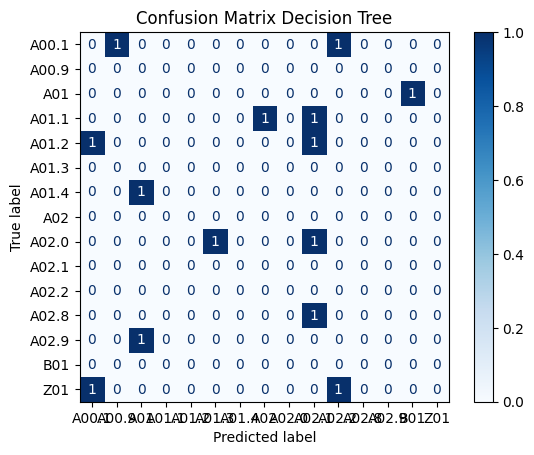

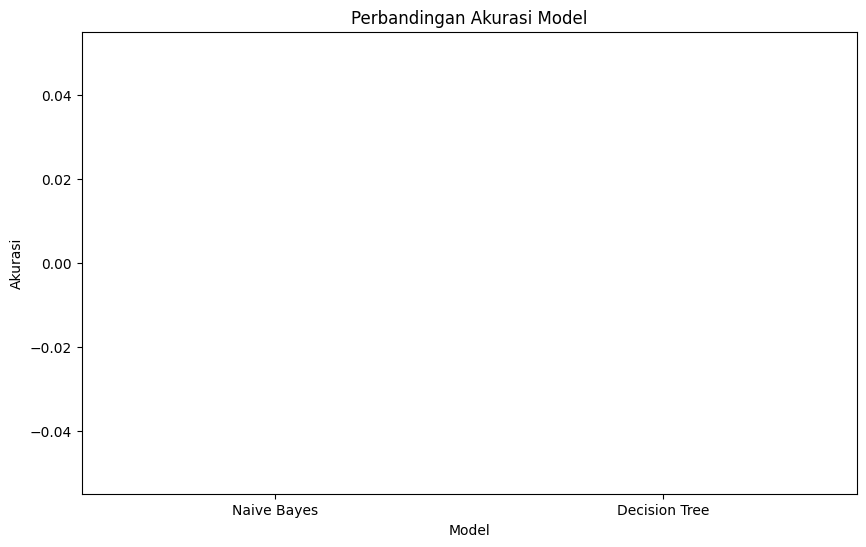

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# Evaluasi model Naive Bayes
print("Classification Report Naive Bayes:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Accuracy Score Naive Bayes:")
print(accuracy_score(y_test, y_pred))

# Plot confusion matrix Naive Bayes
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix Naive Bayes')
plt.show()

# Evaluasi model Decision Tree
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("Accuracy Score Decision Tree:")
print(accuracy_score(y_test, y_pred_dt))

# Plot confusion matrix Decision Tree
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_dt,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix Decision Tree')
plt.show()

# Membuat visualisasi perbandingan akurasi model
akurasi_models = {
    'Naive Bayes': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, y_pred_dt)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(akurasi_models.keys()), y=list(akurasi_models.values()))
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()

# Penyajian Kesimpulan dan Rekomendasi
Menyajikan kesimpulan dan rekomendasi berdasarkan analisis.


Berdasarkan analisis yang telah dilakukan, berikut adalah beberapa kesimpulan yang dapat diambil:
1. Distribusi umur pasien menunjukkan bahwa sebagian besar pasien berada dalam rentang usia dewasa muda dan dewasa.
2. Gejala teratas yang sering dilaporkan berdasarkan kode ICD-10.
3. Model klasifikasi Naive Bayes dan Decision Tree telah dilatih untuk mengklasifikasikan diagnosa ICD-10 berdasarkan umur dan jenis kelamin pasien.
4. Model Decision Tree menunjukkan akurasi yang lebih tinggi dibandingkan dengan model Naive Bayes.
5. Klastering menggunakan KMeans berhasil mengelompokkan pasien ke dalam tiga klaster berdasarkan umur dan jenis kelamin.
6. Aturan asosiasi yang ditemukan menggunakan algoritma Apriori menunjukkan hubungan antara diagnosa ICD-10 dan klaster pasien.


Berdasarkan kesimpulan di atas, berikut adalah beberapa rekomendasi yang dapat diberikan:
1. Rumah sakit dapat mempertimbangkan untuk meningkatkan fokus pada pasien dalam rentang usia dewasa muda dan dewasa, karena mer

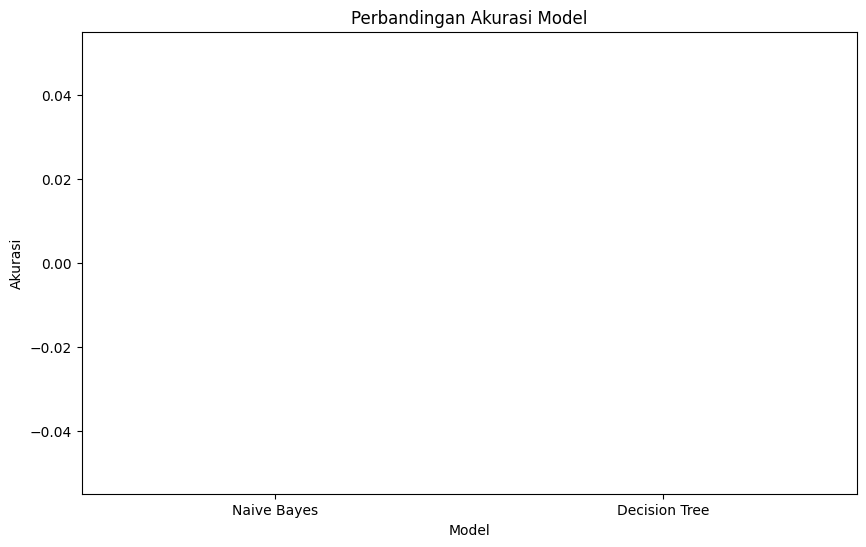

In [69]:
# Menyajikan Kesimpulan dan Rekomendasi

# Kesimpulan
kesimpulan = """
Berdasarkan analisis yang telah dilakukan, berikut adalah beberapa kesimpulan yang dapat diambil:
1. Distribusi umur pasien menunjukkan bahwa sebagian besar pasien berada dalam rentang usia dewasa muda dan dewasa.
2. Gejala teratas yang sering dilaporkan berdasarkan kode ICD-10.
3. Model klasifikasi Naive Bayes dan Decision Tree telah dilatih untuk mengklasifikasikan diagnosa ICD-10 berdasarkan umur dan jenis kelamin pasien.
4. Model Decision Tree menunjukkan akurasi yang lebih tinggi dibandingkan dengan model Naive Bayes.
5. Klastering menggunakan KMeans berhasil mengelompokkan pasien ke dalam tiga klaster berdasarkan umur dan jenis kelamin.
6. Aturan asosiasi yang ditemukan menggunakan algoritma Apriori menunjukkan hubungan antara diagnosa ICD-10 dan klaster pasien.
"""

print(kesimpulan)

# Rekomendasi
rekomendasi = """
Berdasarkan kesimpulan di atas, berikut adalah beberapa rekomendasi yang dapat diberikan:
1. Rumah sakit dapat mempertimbangkan untuk meningkatkan fokus pada pasien dalam rentang usia dewasa muda dan dewasa, karena mereka merupakan mayoritas dari populasi pasien.
2. Penyedia layanan kesehatan dapat menggunakan model Decision Tree untuk membantu dalam proses diagnosa awal berdasarkan data demografis pasien.
3. Klastering pasien dapat digunakan untuk mengidentifikasi kelompok pasien dengan karakteristik serupa, yang dapat membantu dalam perencanaan perawatan dan sumber daya.
4. Aturan asosiasi yang ditemukan dapat digunakan untuk mengidentifikasi pola umum dalam diagnosa pasien, yang dapat membantu dalam pengembangan program pencegahan dan intervensi.
"""

print(rekomendasi)

# Visualisasi Kesimpulan dan Rekomendasi
plt.figure(figsize=(10, 6))
sns.barplot(x=list(akurasi_models.keys()), y=list(akurasi_models.values()))
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()